In [1]:
# Please use the following code to visualize your predictions before submission
# You should have already validated the prediction format using validate_prediction_format.

In [2]:
import sys
sys.path.append('..')
from util.eval_util import validate_pred_format
from util.dataset_util import read_video, read_cam_params, project_3d_to_2d, plot_over_image
from util.eval_util import load_data
import matplotlib.pyplot as plt
import numpy as np

In [3]:
data_template_path = '../../datasets/chi3d/template.json' # template file
data_pred_path = '../../datasets/chi3d/cliff_chi3d_003352.json'  # prediction file to be submitted; replace this with your prediction

In [5]:
dataset_path = '../../datasets/chi3d/'
subset = 'test'
subj_name = 's01'
action_name = 'Grab 10'
person_id = 0 # 0 or 1 in chi3d, which requires 2 person predictions and 0 in humansc3d and fit3d

In [6]:
data = load_data(data_pred_path)
vid_path = dataset_path + subset + "/" + subj_name + "/videos/" + action_name + '.mp4'
video = read_video(vid_path)
cam_path = dataset_path + subset + "/" + subj_name + "/camera_parameters/" + action_name + '.json'
cam_params = read_cam_params(cam_path)
frame_id = data[subj_name][action_name]['other']['contact_fr_id']
frame_id = data[subj_name][action_name]['other']['video_fr_ids'][0] if frame_id is None else frame_id
image_id = data[subj_name][action_name]['other']['video_fr_ids'].index(frame_id)
frame = video[frame_id]

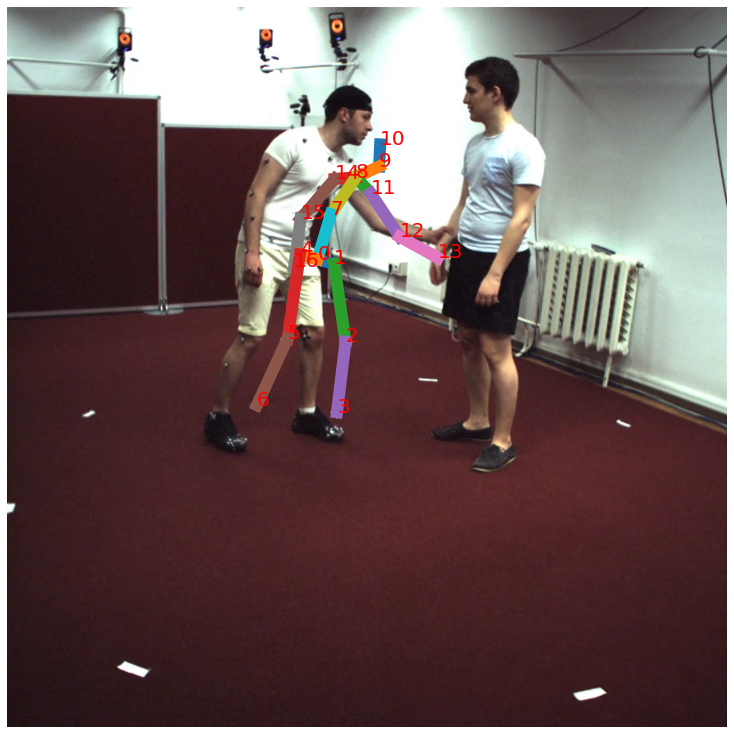

In [7]:
j3d = data[subj_name][action_name]['persons'][person_id]['joints3d']['joints3d'][image_id]
j2d = project_3d_to_2d(j3d, cam_params['intrinsics_wo_distortion'], 'wo_distortion')
plot_over_image(frame, j2d)

In [8]:
from util.ghum_util import GHUMHelper
GHUM_Models_Path = '../../ghumrepo/ghum/shmodels'
ghum_helper = GHUMHelper(GHUM_Models_Path)


Two checkpoint references resolved to different objects (<tensorflow.python.keras.saving.saved_model.load.LBSLayer object at 0x7fc7e81c9cc0> and <tensorflow.python.keras.engine.input_layer.InputLayer object at 0x7fc7e7ad8e80>).
Import error for tensorflow_graphics renderer: 
(<class 'ImportError'>, ImportError("cannot import name 'look_at'",), <traceback object at 0x7fc7de4f7708>)
Reverting to pyrender implementation


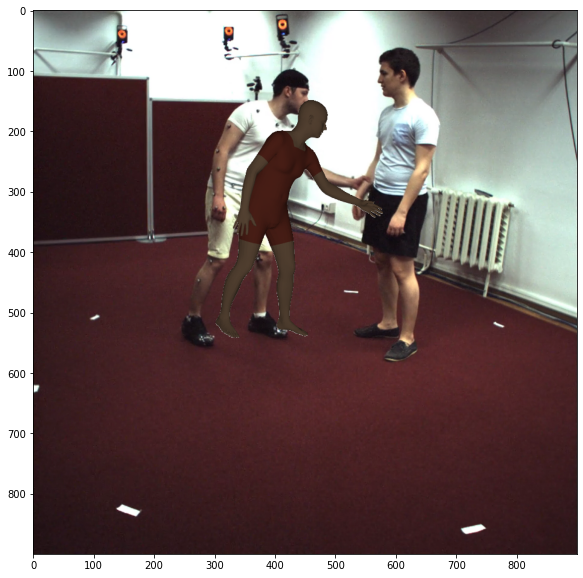

In [9]:
gpp_data = {key: data[subj_name][action_name]['persons'][person_id]['gpp'][key] for key in data[subj_name][action_name]['persons'][person_id]['gpp']}
camera_gpp = ghum_helper.get_world_gpp(gpp_data)
camera_posed_data_ghum = ghum_helper.ghum_model.pose(camera_gpp)
rendered_image = ghum_helper.render(camera_posed_data_ghum.vertices[image_id], frame, cam_params, vertices_in_world=False)
figure = plt.figure(figsize=(10, 10))
plt.imshow(rendered_image)
plt.show()

In [10]:
from util.smplx_util import SMPLXHelper
SMPLX_Models_Path = '../../smplx_body_models'
smplx_helper = SMPLXHelper(SMPLX_Models_Path)

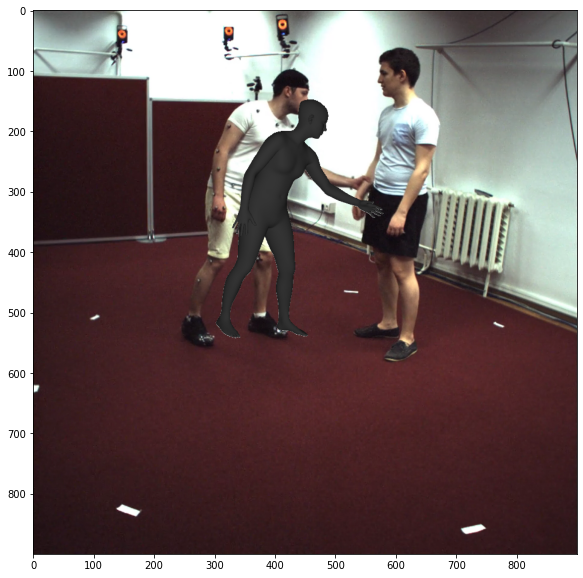

In [11]:
smplx_param_data = {key: data[subj_name][action_name]['persons'][person_id]['smplx'][key] for key in data[subj_name][action_name]['persons'][person_id]['smplx']}
camera_smplx_params = smplx_helper.get_world_smplx_params(smplx_param_data)
camera_posed_data_smplx = smplx_helper.smplx_model(**camera_smplx_params)
rendered_image = smplx_helper.render(camera_posed_data_smplx.vertices[image_id], frame, cam_params, vertices_in_world=False)
figure = plt.figure(figsize=(10, 10))
plt.imshow(rendered_image)
plt.show()

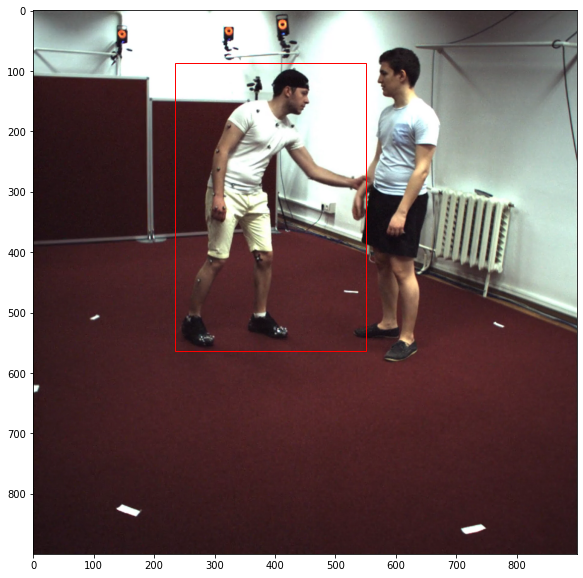

In [12]:
import matplotlib.patches as patches
from PIL import Image

fig, ax = plt.subplots(figsize=(10, 10))
ax.imshow(frame)
bbox = data[subj_name][action_name]['persons'][person_id]['bbox']['bbox'][image_id]
rect = patches.Rectangle((bbox[0], bbox[1]), bbox[2]-bbox[0], bbox[3]-bbox[1], linewidth=1, edgecolor='r', facecolor='none')
ax.add_patch(rect)